<a href="https://colab.research.google.com/github/baharv/CNN-NR-IQA/blob/main/CNN_max_min_pooling_simple_global__with_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install patool

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import patoolib
patoolib.extract_archive("/content/drive/MyDrive/test_dataset.rar", outdir="/content/sample_data")


patool: Extracting /content/drive/MyDrive/test_dataset.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/test_dataset.rar
patool:     with cwd='/content/sample_data'
patool: ... /content/drive/MyDrive/test_dataset.rar extracted to `/content/sample_data'.


'/content/sample_data'

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [8]:
x = cv2.imread('/content/sample_data/test_dataset/test/img10.bmp')

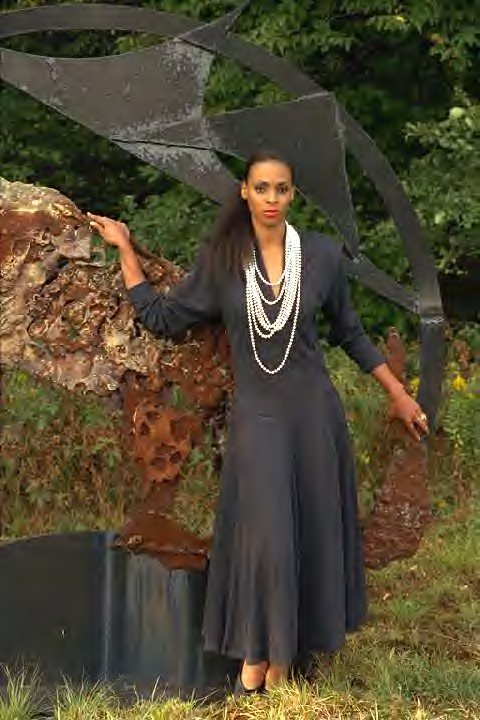

In [9]:
from google.colab.patches import cv2_imshow
cv2_imshow(x)

In [10]:
import pandas as pd


In [11]:
df = pd.read_excel('/content/sample_data/test_dataset/New Microsoft Excel Worksheet.xlsx')

In [12]:
df['dmos']

0     28.003845
1     34.010736
2     65.131410
3     68.911340
4     65.150103
        ...    
94    27.447222
95    43.718266
96    31.559569
97    42.161538
98    69.319888
Name: dmos, Length: 99, dtype: float64

In [13]:
df.shape

(99, 5)

In [14]:
import os

In [15]:
f = os.listdir('/content/sample_data/test_dataset/test')

In [16]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]


In [17]:
name = []
for x in f:
  #print(x.split('.')[0])
  name.append(x.split('.')[0])

In [18]:

f.sort(key=natural_keys)
print(f)

['img2.bmp', 'img3.bmp', 'img4.bmp', 'img5.bmp', 'img6.bmp', 'img7.bmp', 'img8.bmp', 'img10.bmp', 'img12.bmp', 'img13.bmp', 'img14.bmp', 'img15.bmp', 'img17.bmp', 'img18.bmp', 'img19.bmp', 'img21.bmp', 'img23.bmp', 'img26.bmp', 'img27.bmp', 'img28.bmp', 'img29.bmp', 'img30.bmp', 'img31.bmp', 'img32.bmp', 'img33.bmp', 'img34.bmp', 'img37.bmp', 'img38.bmp', 'img39.bmp', 'img40.bmp', 'img41.bmp', 'img42.bmp', 'img43.bmp', 'img44.bmp', 'img45.bmp', 'img46.bmp', 'img47.bmp', 'img48.bmp', 'img49.bmp', 'img51.bmp', 'img52.bmp', 'img53.bmp', 'img55.bmp', 'img56.bmp', 'img58.bmp', 'img59.bmp', 'img60.bmp', 'img61.bmp', 'img62.bmp', 'img63.bmp', 'img65.bmp', 'img68.bmp', 'img69.bmp', 'img71.bmp', 'img74.bmp', 'img75.bmp', 'img77.bmp', 'img78.bmp', 'img79.bmp', 'img80.bmp', 'img81.bmp', 'img82.bmp', 'img83.bmp', 'img85.bmp', 'img86.bmp', 'img88.bmp', 'img90.bmp', 'img91.bmp', 'img92.bmp', 'img94.bmp', 'img96.bmp', 'img98.bmp', 'img99.bmp', 'img101.bmp', 'img102.bmp', 'img103.bmp', 'img104.bmp', '

In [19]:
label = df['dmos']

In [20]:
label

0     28.003845
1     34.010736
2     65.131410
3     68.911340
4     65.150103
        ...    
94    27.447222
95    43.718266
96    31.559569
97    42.161538
98    69.319888
Name: dmos, Length: 99, dtype: float64

In [21]:
data=[]
for x in f:
  path = os.path.join('/content/sample_data/test_dataset/test',x)
  input = cv2.imread(path)
  informaion = cv2.resize(input, (224, 224))
  data.append(informaion)
total_data = np.array(data)

In [22]:
total_data.shape

(99, 224, 224, 3)

In [23]:
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
import keras
import keras
from tensorflow import keras
from tensorflow.python.keras.layers import Input, Dense, Dropout,Conv2D,MaxPooling2D,Activation,Flatten,AveragePooling2D,GlobalMaxPooling2D,Add
from tensorflow.python.keras.models import Sequential
from keras import layers

In [24]:
total_data = total_data.astype('float32')

In [25]:
from keras import backend as K

In [26]:
def min_pool2d(x):

    max_val = K.max(x) + 1 # we gonna replace all zeros with that value
    # replace all 0s with very high numbers
    is_zero = max_val * K.cast(K.equal(x,0), dtype=K.floatx())
    x = is_zero + x

    # execute pooling with 0s being replaced by a high number
    min_x = -K.pool2d(-x, pool_size=(2, 2),padding='valid',strides=(2,2))

    # depending on the value we either substract the zero replacement or not
    is_result_zero = max_val * K.cast(K.equal(min_x, max_val), dtype=K.floatx()) 
    min_x = min_x - is_result_zero

    return min_x # concatenate on channel

In [27]:
def global_min_pool2d(x):

    max_val = K.max(x) + 1 # we gonna replace all zeros with that value
    # replace all 0s with very high numbers
    is_zero = max_val * K.cast(K.equal(x,0), dtype=K.floatx())
    x = is_zero + x

    # execute pooling with 0s being replaced by a high number
    min_x = -K.pool2d(-x, pool_size=(x.shape[1], x.shape[2]))

    # depending on the value we either substract the zero replacement or not
    is_result_zero = max_val * K.cast(K.equal(min_x, max_val), dtype=K.floatx()) 
    min_x = min_x - is_result_zero

    return min_x # concatenate on channel

In [28]:
import tensorflow as tf
tf.keras.backend.set_floatx('float32')
input_A = keras.layers.Input(shape=[224,224,3])
y=Conv2D(1, (3),data_format='channels_last',activation='relu',padding='valid')(total_data)
y2=MaxPooling2D((2,2),padding='valid',strides=(2,2))(y)
y1 = min_pool2d(y)
y3 = keras.layers.Concatenate(axis=-1)([y1, y2])
data=Flatten()(y3)
data.shape

TensorShape([99, 24642])

In [29]:
import tensorflow as tf
tf.keras.backend.set_floatx('float32')
input_A = keras.layers.Input(shape=[224,224,3])
y=Conv2D(1, (3),data_format='channels_last',activation='relu',padding='valid')(total_data)
y2= GlobalMaxPooling2D()(y)
y1 = global_min_pool2d(y)
y1_1 = Flatten()(y1)
print(y1_1.shape)
print(y2.shape)
y3 = keras.layers.Concatenate()([y1_1, y2])
data_max=Flatten()(y3)
data_max.shape

(99, 1)
(99, 1)


TensorShape([99, 2])

In [30]:
label = np.array(label)
label = label.reshape(label.shape[0],1)
label = label.ravel()

In [31]:
data =np.array(data)
data = data.astype('float32')

In [32]:
data_max = np.array(data_max)
data_max = data_max.astype('float32')

In [33]:
from sklearn.model_selection import train_test_split
train_set, test_set = data[0:80],data[80:]
target_train,target_test = label[0:80],label[80:]
print(target_train.shape,target_test.shape)
print(test_set.shape)
print(train_set.shape)

(80,) (19,)
(19, 24642)
(80, 24642)


In [34]:
from sklearn.model_selection import train_test_split
train_set, test_set,target_train,target_tests = train_test_split(data_max,label, test_size=0.3, random_state=21)
print(train_set.shape,target_train.shape, test_set.shape,target_tests.shape)

(69, 2) (69,) (30, 2) (30,)


In [39]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [i for i in np.linspace(0.1,1,100)], 
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
grid.fit(train_set, target_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] C=0.1, kernel=rbf ...............................................
[CV] ................... C=0.1, kernel=rbf, score=0.000, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] .................. C=0.1, kernel=rbf, score=-0.326, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] .................. C=0.1, kernel=rbf, score=-0.279, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] .................. C=0.1, kernel=rbf, score=-0.197, total=   0.0s
[CV] C=0.1, kernel=rbf ...............................................
[CV] .................. C=0.1, kernel=rbf, score=-0.114, total=   0.0s
[CV] C=0.1090909090909091, kernel=rbf ................................
[CV] .... C=0.1090909090909091, kernel=rbf, score=0.000, total=   0.0s
[CV] C=0.1090909090909091, kernel=rbf ................................
[CV] ... C=0.1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... C=0.2090909090909091, kernel=rbf, score=0.002, total=   0.0s
[CV] C=0.2090909090909091, kernel=rbf ................................
[CV] ... C=0.2090909090909091, kernel=rbf, score=-0.326, total=   0.0s
[CV] C=0.2090909090909091, kernel=rbf ................................
[CV] ... C=0.2090909090909091, kernel=rbf, score=-0.283, total=   0.0s
[CV] C=0.2090909090909091, kernel=rbf ................................
[CV] ... C=0.2090909090909091, kernel=rbf, score=-0.190, total=   0.0s
[CV] C=0.2090909090909091, kernel=rbf ................................
[CV] ... C=0.2090909090909091, kernel=rbf, score=-0.113, total=   0.0s
[CV] C=0.2181818181818182, kernel=rbf ................................
[CV] .... C=0.2181818181818182, kernel=rbf, score=0.002, total=   0.0s
[CV] C=0.2181818181818182, kernel=rbf ................................
[CV] ... C=0.2181818181818182, kernel=rbf, score=-0.326, total=   0.0s
[CV] C=0.2181818181818182, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.1090909090909091, 0.1181818181818182,
                               0.1272727272727273, 0.13636363636363635,
                               0.14545454545454545, 0.15454545454545454,
                               0...
                               0.24545454545454545, 0.2545454545454545,
                               0.26363636363636367, 0.2727272727272727,
                               0.28181818181818186, 0.2909090909090909, 0.3,
                               0.3090909090909091, 0.3181818181818182,
                               0.32727272727272727, 0.33636363636363636,
                               0.345454545454

In [38]:
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 0.9909090909090909, 'kernel': 'rbf'}
SVR(C=0.9909090909090909, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='scale', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
    verbose=False)


median error 17.534142124304815
Mean squared error 299.43816399198516
Mean absolute error 15.015640779285638


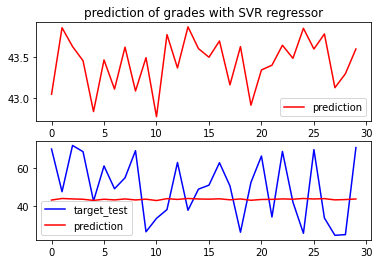

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
pred = grid.predict(test_set)
print("median error",median_absolute_error(target_tests, pred))
print("Mean squared error",mean_squared_error(target_tests, pred))
print("Mean absolute error",mean_absolute_error(target_tests, pred))

plt.subplot(2, 1, 1)
plt.title('prediction of grades with SVR regressor')
plt.plot(pred,color = 'red', label = 'prediction')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(target_tests,color = 'blue', label = 'target_test')
plt.plot(pred,color = 'red', label = 'prediction')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.01
j 0.01
median error 16.08695478886987
Mean squared error 331.4993216151922
Mean absolute error 15.87495021069822


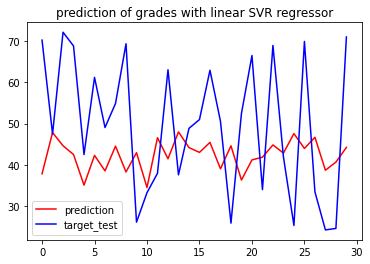

i 0.011414141414141415
j 0.011414141414141415
median error 15.838801667240682
Mean squared error 315.09782427370385
Mean absolute error 15.634059807010374


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


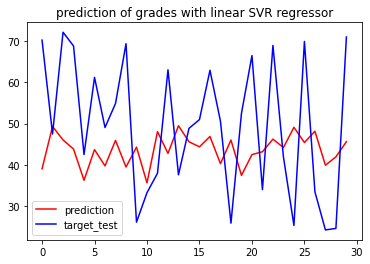

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.012828282828282828
j 0.012828282828282828
median error 16.086980975477367
Mean squared error 331.41213357834806
Mean absolute error 15.873110805196518


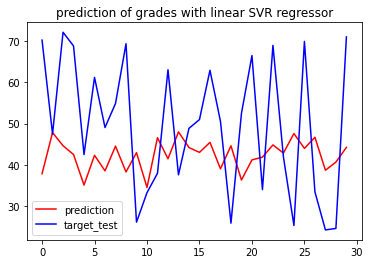

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.014242424242424242
j 0.014242424242424242
median error 15.836822520652598
Mean squared error 315.02168298464187
Mean absolute error 15.630216114322762


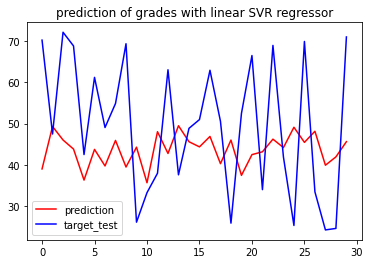

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.015656565656565657
j 0.015656565656565657
median error 14.096655503642031
Mean squared error 368.7519643322454
Mean absolute error 16.575562287088946


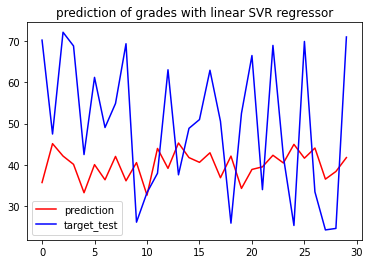

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.01707070707070707
j 0.01707070707070707
median error 15.836551234980258
Mean squared error 315.0264604233995
Mean absolute error 15.629670940244946


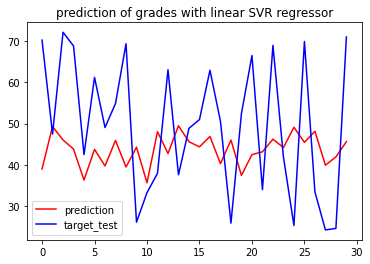

i 0.018484848484848486
j 0.018484848484848486
median error 15.79249508070889
Mean squared error 309.4792260782562
Mean absolute error 15.532475938770734


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


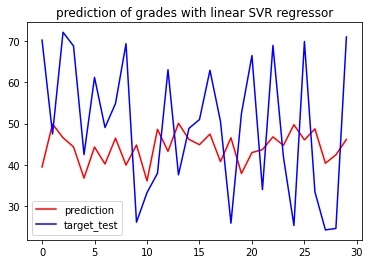

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.019898989898989895
j 0.019898989898989895
median error 16.08625588382226
Mean squared error 330.76540422612993
Mean absolute error 15.856052763540555


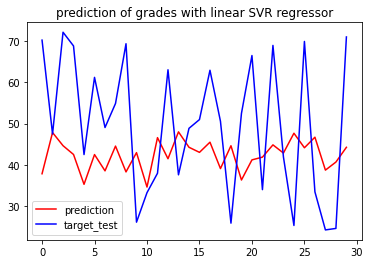

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.02131313131313131
j 0.02131313131313131
median error 16.09947824494071
Mean squared error 327.1021430371003
Mean absolute error 15.804431295955592


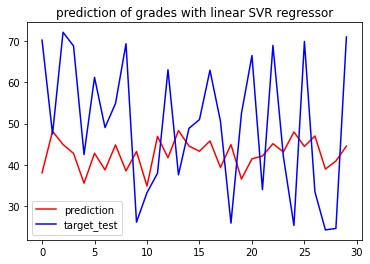

i 0.022727272727272728
j 0.022727272727272728
median error 15.782790530779819
Mean squared error 309.0133849397506
Mean absolute error 15.513985145799886


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


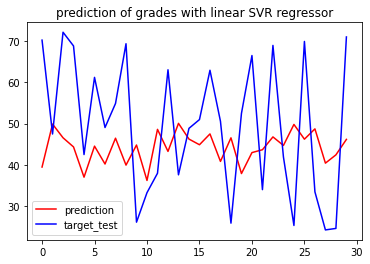

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.024141414141414137
j 0.024141414141414137
median error 16.085468595488784
Mean squared error 330.2411600332553
Mean absolute error 15.841639938481553


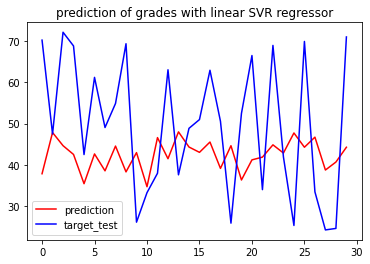

i 0.025555555555555554
j 0.025555555555555554
median error 13.96208430326355
Mean squared error 381.95176354628506
Mean absolute error 16.82259130928316


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


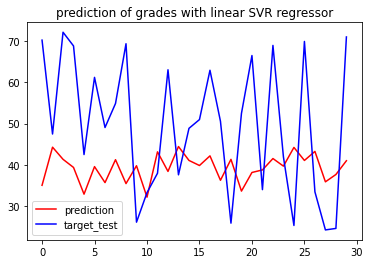

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.02696969696969697
j 0.02696969696969697
median error 16.097493591933542
Mean squared error 325.87505576647675
Mean absolute error 15.76856121782118


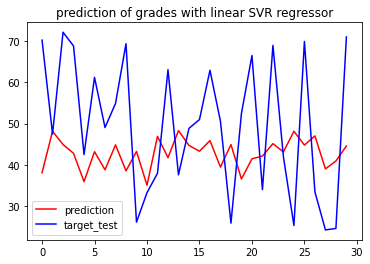

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.02838383838383838
j 0.02838383838383838
median error 16.06764190339516
Mean squared error 334.5335631072987
Mean absolute error 15.893352911489666


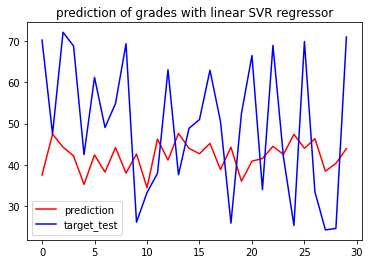

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.029797979797979796
j 0.029797979797979796
median error 16.09890798167082
Mean squared error 326.52643745495635
Mean absolute error 15.788868633918035


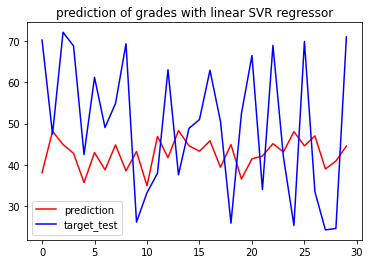

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.031212121212121212
j 0.031212121212121212
median error 16.08648758340589
Mean squared error 330.4879078767299
Mean absolute error 15.850666373970263


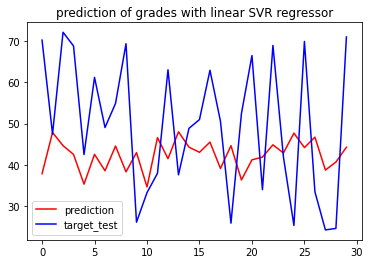

i 0.03262626262626262
j 0.03262626262626262
median error 16.06797706410292
Mean squared error 334.5459780934795
Mean absolute error 15.894339409493504


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


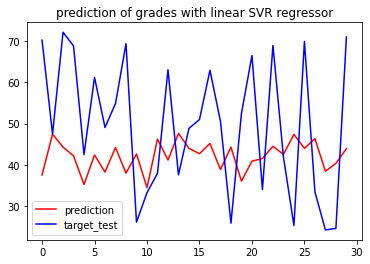

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.03404040404040404
j 0.03404040404040404
median error 16.090268329540987
Mean squared error 295.96550227001467
Mean absolute error 15.235459862729876


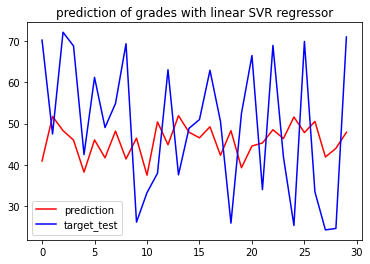

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.035454545454545454
j 0.035454545454545454
median error 16.099171903807978
Mean squared error 326.4984264667224
Mean absolute error 15.78913908503292


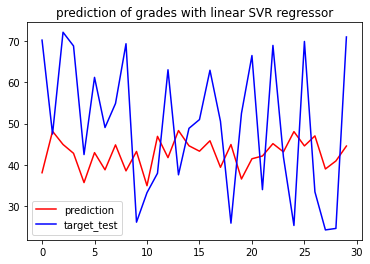

i 0.03686868686868686
j 0.03686868686868686
median error 14.11496265768235
Mean squared error 368.3373518727764
Mean absolute error 16.56620177722698


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


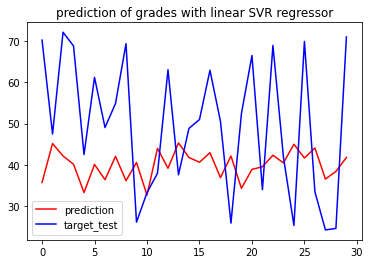

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.03828282828282828
j 0.03828282828282828
median error 15.072133518483238
Mean squared error 416.9845914887189
Mean absolute error 17.436333079805713


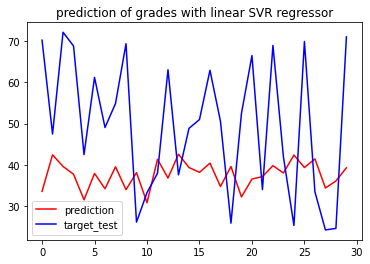

i 0.039696969696969696
j 0.039696969696969696
median error 15.803174614986316
Mean squared error 310.1848078555661
Mean absolute error 15.553270047807105


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


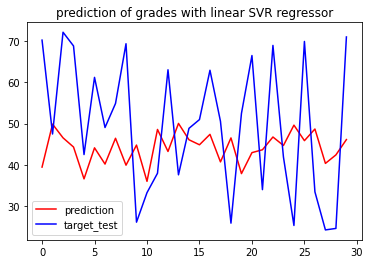

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.041111111111111105
j 0.041111111111111105
median error 16.084893751292434
Mean squared error 329.25291364825176
Mean absolute error 15.816488763274464


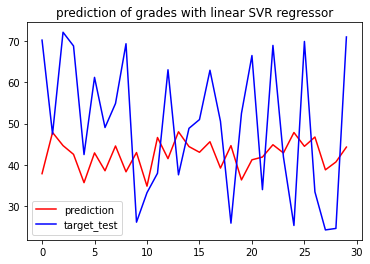

i 0.04252525252525252
j 0.04252525252525252
median error 16.488742190097458
Mean squared error 285.45592246707395
Mean absolute error 14.788406392165381


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


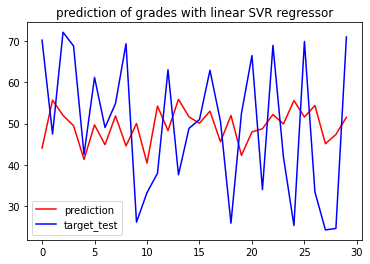

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.04393939393939394
j 0.04393939393939394
median error 14.518433788879104
Mean squared error 394.95474659937076
Mean absolute error 17.03906793657426


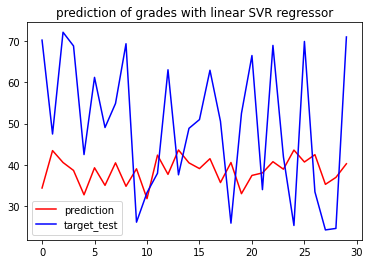

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.04535353535353535
j 0.04535353535353535
median error 16.08655423321194
Mean squared error 329.8786714659328
Mean absolute error 15.83633201935593


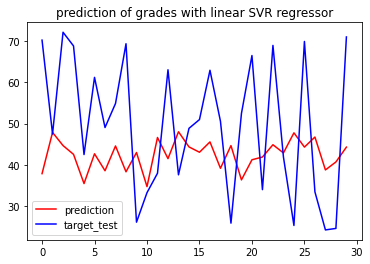

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.046767676767676764
j 0.046767676767676764
median error 15.754420736522917
Mean squared error 293.9015822643826
Mean absolute error 14.691772872934868


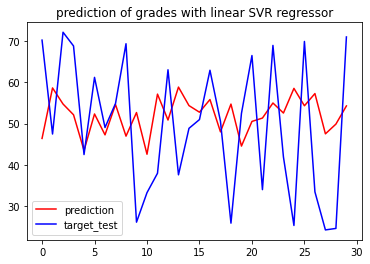

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.04818181818181818
j 0.04818181818181818
median error 16.067831390958304
Mean squared error 333.8181017595079
Mean absolute error 15.87579106717479


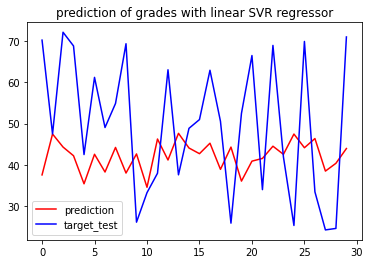

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.04959595959595959
j 0.04959595959595959
median error 16.380951418925196
Mean squared error 287.74461676978984
Mean absolute error 14.670632755112848


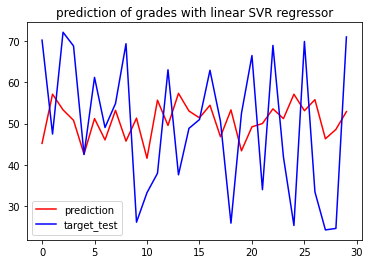

i 0.051010101010101006
j 0.051010101010101006
median error 15.853980334384506
Mean squared error 446.5175761781868
Mean absolute error 17.876427280425155


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


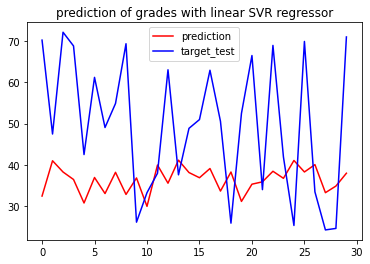

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.05242424242424242
j 0.05242424242424242
median error 16.10069958196702
Mean squared error 326.64566181364387
Mean absolute error 15.796743731815496


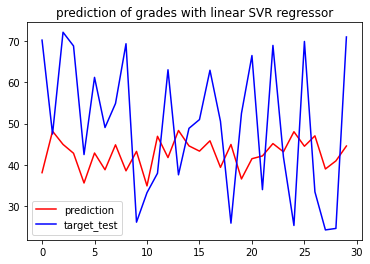

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.05383838383838383
j 0.05383838383838383
median error 15.788875675106748
Mean squared error 447.6808261797475
Mean absolute error 17.911803673491214


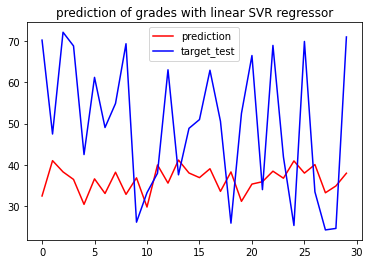

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.05525252525252525
j 0.05525252525252525
median error 15.77724761818371
Mean squared error 308.96397777936556
Mean absolute error 15.503787372764725


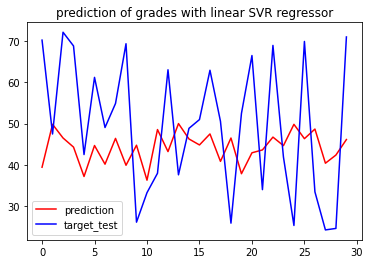

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.056666666666666664
j 0.056666666666666664
median error 15.638432017538847
Mean squared error 293.80114026871956
Mean absolute error 14.691374335747074


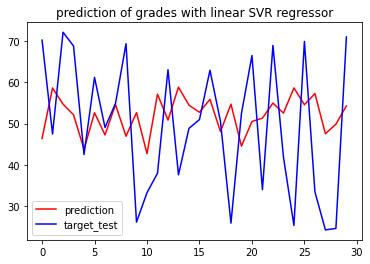

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.05808080808080807
j 0.05808080808080807
median error 16.497990857901303
Mean squared error 285.6917885602631
Mean absolute error 14.718226377761656


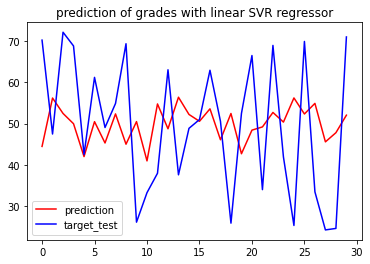

i 0.05949494949494949
j 0.05949494949494949
median error 16.488240652434683
Mean squared error 285.19343141374276
Mean absolute error 14.77131069382226


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


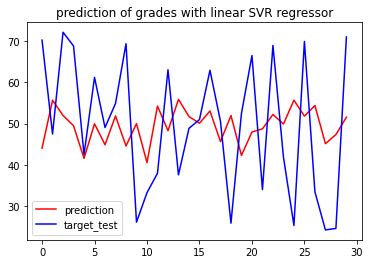

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.060909090909090906
j 0.060909090909090906
median error 13.954362525889026
Mean squared error 381.3004854623058
Mean absolute error 16.807119180749662


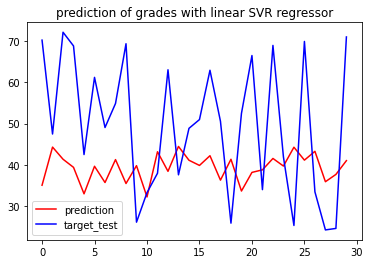

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.062323232323232315
j 0.062323232323232315
median error 15.798844201810804
Mean squared error 310.12209575119255
Mean absolute error 15.545550051734812


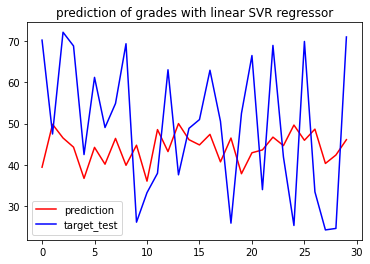

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.06373737373737373
j 0.06373737373737373
median error 15.525004171198077
Mean squared error 428.1486162656099
Mean absolute error 17.617538283721657


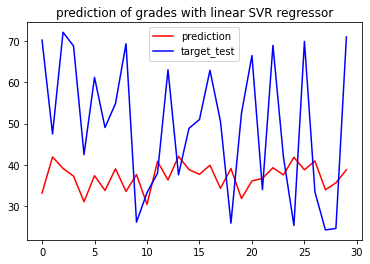

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.06515151515151514
j 0.06515151515151514
median error 16.484246611903433
Mean squared error 285.12507719987923
Mean absolute error 14.793646355717819


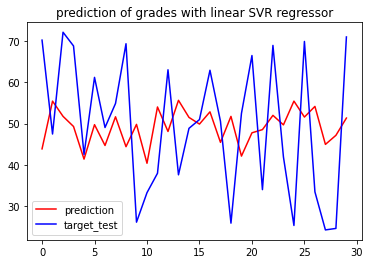

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.06656565656565655
j 0.06656565656565655
median error 14.083713479870424
Mean squared error 366.9671255857841
Mean absolute error 16.515482015047553


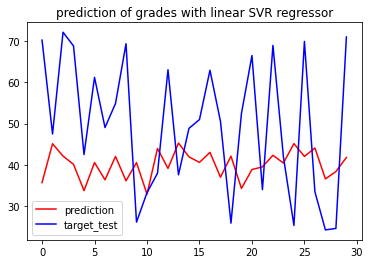

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.06797979797979797
j 0.06797979797979797
median error 16.356670843649024
Mean squared error 287.3274146371281
Mean absolute error 14.967969141467742


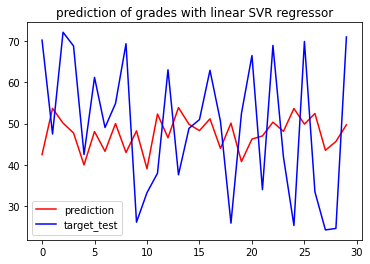

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.06939393939393938
j 0.06939393939393938
median error 15.52145444691357
Mean squared error 428.0160921269588
Mean absolute error 17.614982271815453


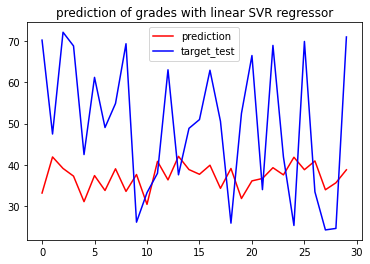

i 0.07080808080808079
j 0.07080808080808079
median error 16.07102381811988
Mean squared error 334.5563463470289
Mean absolute error 15.901816726823661


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


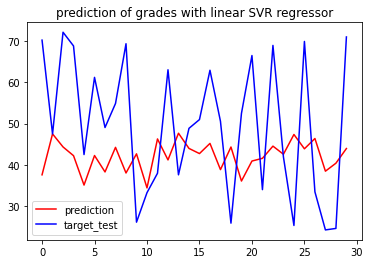

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.07222222222222222
j 0.07222222222222222
median error 14.473818656677413
Mean squared error 303.4191501012039
Mean absolute error 14.788908466357471


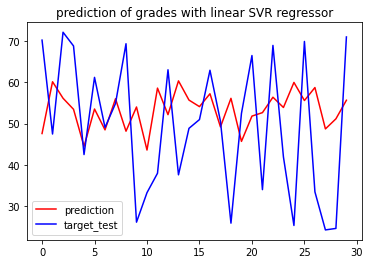

i 0.07363636363636362
j 0.07363636363636362
median error 15.834386354052631
Mean squared error 315.3205105443684
Mean absolute error 15.626601792751568


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


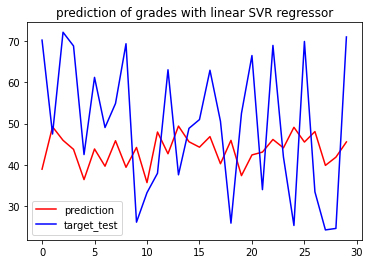

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.07505050505050503
j 0.07505050505050503
median error 15.866901922841269
Mean squared error 293.7866255270063
Mean absolute error 14.69150248661055


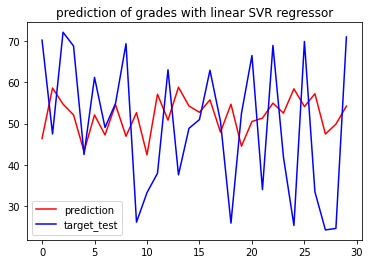

i 0.07646464646464644
j 0.07646464646464644
median error 16.091417040801936
Mean squared error 330.76682390363567
Mean absolute error 15.870409039965478


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


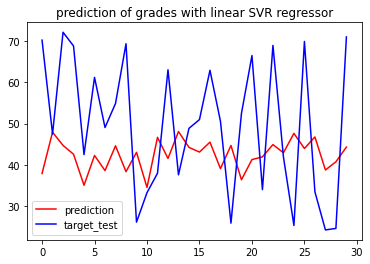

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.07787878787878787
j 0.07787878787878787
median error 16.300407821200764
Mean squared error 290.91272521017805
Mean absolute error 15.080850799454925


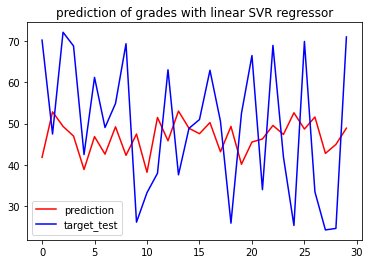

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.07929292929292928
j 0.07929292929292928
median error 16.456283659266468
Mean squared error 490.83664619657935
Mean absolute error 18.52836422997938


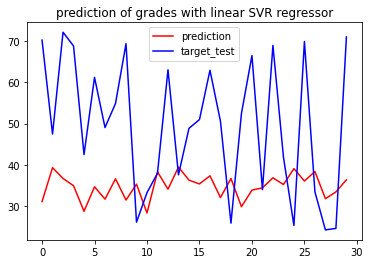

i 0.08070707070707069
j 0.08070707070707069
median error 16.075750966522623
Mean squared error 336.7582358570195
Mean absolute error 15.96486283473104


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


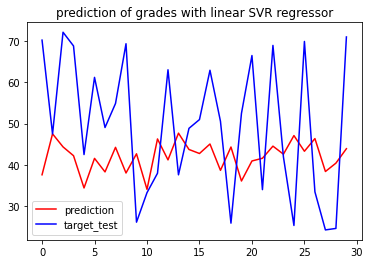

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.08212121212121211
j 0.08212121212121211
median error 16.301430096840583
Mean squared error 291.81859617857026
Mean absolute error 15.124753694336237


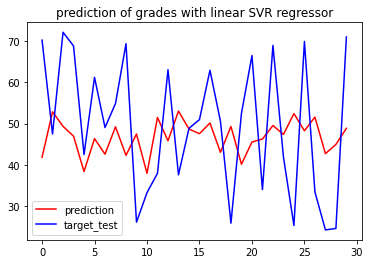

i 0.08353535353535352
j 0.08353535353535352
median error 14.75386360551731
Mean squared error 303.1793034229323
Mean absolute error 14.787952456578223


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


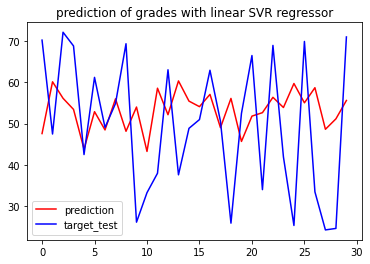

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.08494949494949493
j 0.08494949494949493
median error 15.570200120936317
Mean squared error 451.18726255289124
Mean absolute error 18.022970817243372


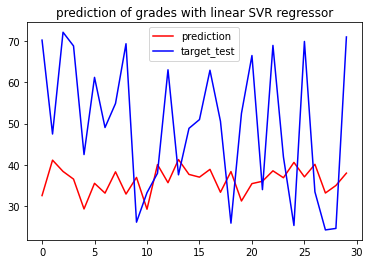

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.08636363636363635
j 0.08636363636363635
median error 16.497559004365005
Mean squared error 286.81394284305117
Mean absolute error 14.813721112916966


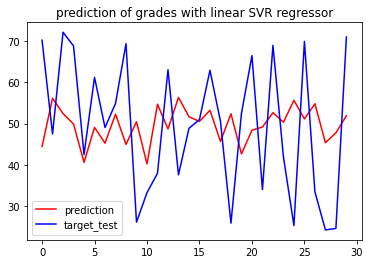

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.08777777777777776
j 0.08777777777777776
median error 16.620812093008308
Mean squared error 288.5849403018753
Mean absolute error 14.770246101755538


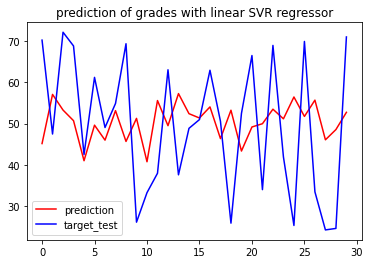

i 0.08919191919191917
j 0.08919191919191917
median error 15.87016873647711
Mean squared error 317.13106034738445
Mean absolute error 15.69464171350577


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


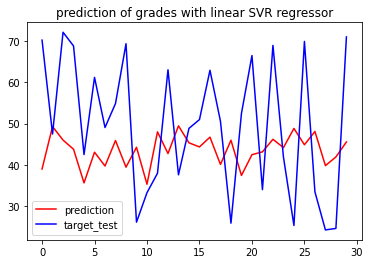

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.09060606060606059
j 0.09060606060606059
median error 15.3600807553481
Mean squared error 429.3940551096896
Mean absolute error 17.692329824812724


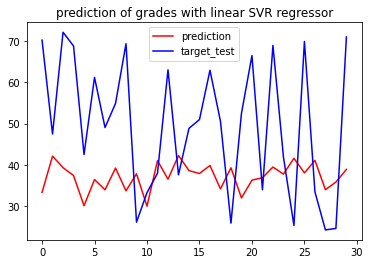

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.092020202020202
j 0.092020202020202
median error 16.302120991605456
Mean squared error 292.5631465028174
Mean absolute error 15.159580507635527


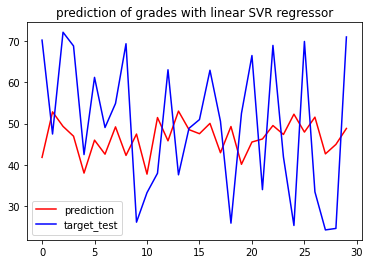

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.09343434343434341
j 0.09343434343434341
median error 25.20973689432084
Mean squared error 844.5520177781322
Mean absolute error 24.24369303603408


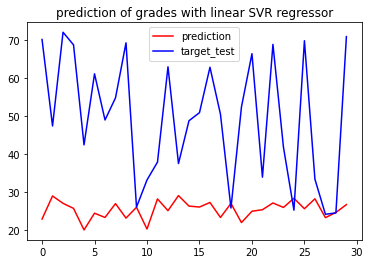

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.09484848484848483
j 0.09484848484848483
median error 16.50103368094384
Mean squared error 287.09505227665625
Mean absolute error 14.800878166572401


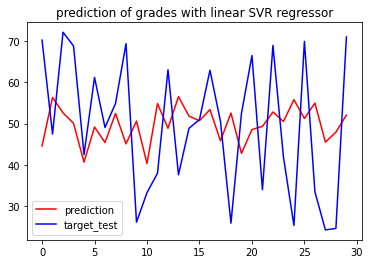

i 0.09626262626262624
j 0.09626262626262624
median error 16.2011262525587
Mean squared error 489.485707399163
Mean absolute error 18.566539836821473


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


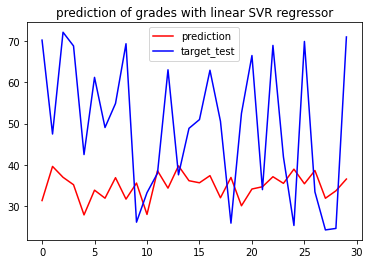

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.09767676767676765
j 0.09767676767676765
median error 16.501412211340963
Mean squared error 288.068573920892
Mean absolute error 14.859952696391693


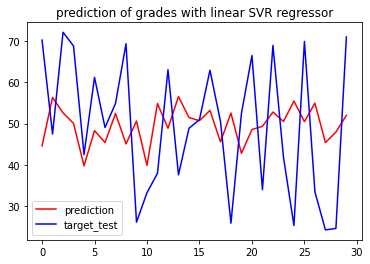

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.09909090909090908
j 0.09909090909090908
median error 11.534203611398365
Mean squared error 356.1083131240109
Mean absolute error 15.522303349926144


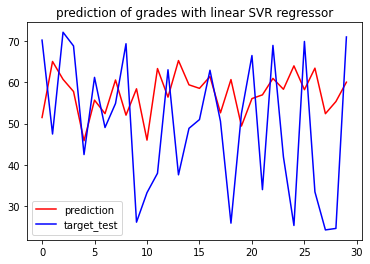

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.10050505050505049
j 0.10050505050505049
median error 14.089208439567859
Mean squared error 314.0988677862069
Mean absolute error 14.924307996910082


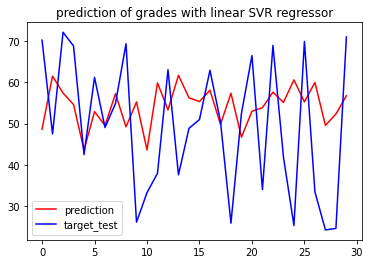

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.1019191919191919
j 0.1019191919191919
median error 16.480012655814487
Mean squared error 288.1486062665348
Mean absolute error 14.978820315415854


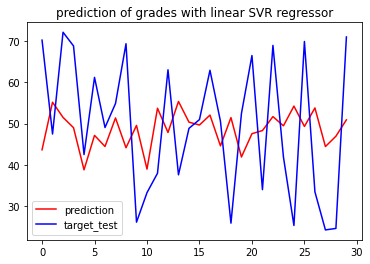

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.10333333333333332
j 0.10333333333333332
median error 23.564407008979742
Mean squared error 772.9873871555434
Mean absolute error 23.152191807750647


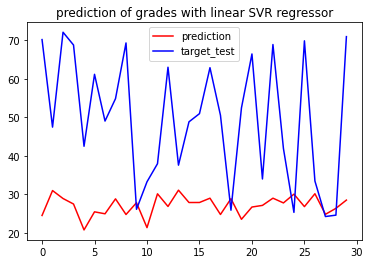

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.10474747474747473
j 0.10474747474747473
median error 12.202899377425936
Mean squared error 416.0319427832566
Mean absolute error 16.27564917894754


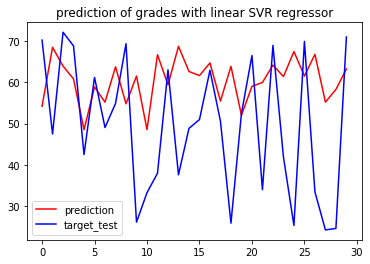

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.10616161616161614
j 0.10616161616161614
median error 15.121254454192734
Mean squared error 432.42636767928695
Mean absolute error 17.820534818144633


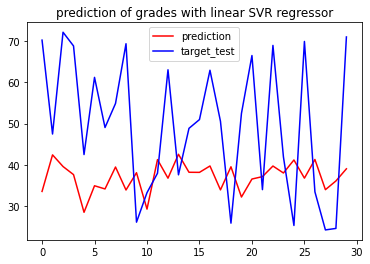

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.10757575757575756
j 0.10757575757575756
median error 16.119404420924393
Mean squared error 335.0733531063623
Mean absolute error 16.035349154418302


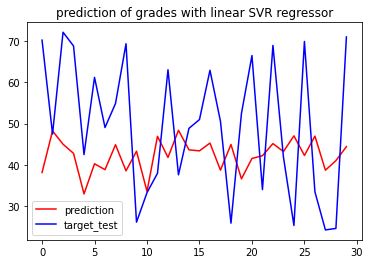

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.10898989898989897
j 0.10898989898989897
median error 11.450105377013791
Mean squared error 360.8106841551977
Mean absolute error 15.57833625238497


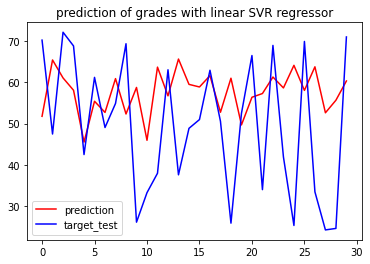

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.11040404040404038
j 0.11040404040404038
median error 16.484873380788066
Mean squared error 289.5253828815174
Mean absolute error 15.020529894086854


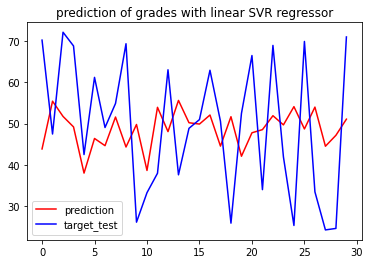

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.1118181818181818
j 0.1118181818181818
median error 26.79553283792187
Mean squared error 942.2943299763075
Mean absolute error 25.92661523731279


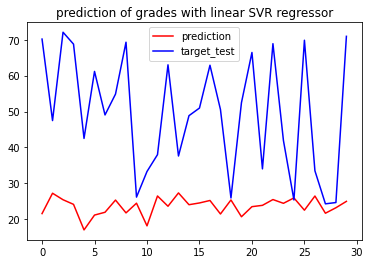

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.11323232323232321
j 0.11323232323232321
median error 16.48477271027959
Mean squared error 289.3871198014609
Mean absolute error 15.015290978533105


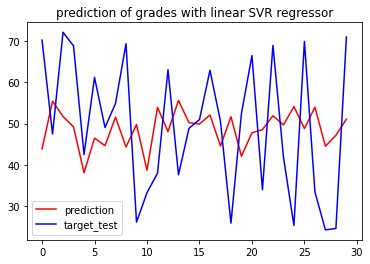

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.11464646464646462
j 0.11464646464646462
median error 14.594400817343704
Mean squared error 419.7293466462479
Mean absolute error 17.6175086049338


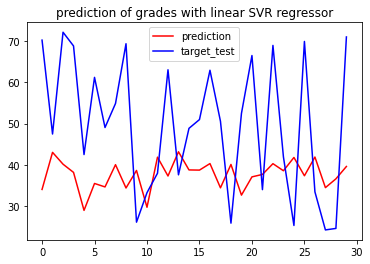

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.11606060606060604
j 0.11606060606060604
median error 11.291831477699908
Mean squared error 398.4531671917652
Mean absolute error 16.04324040392614


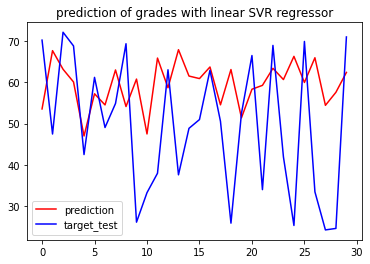

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.11747474747474745
j 0.11747474747474745
median error 15.420398740952166
Mean squared error 458.4154095552152
Mean absolute error 18.22206812991666


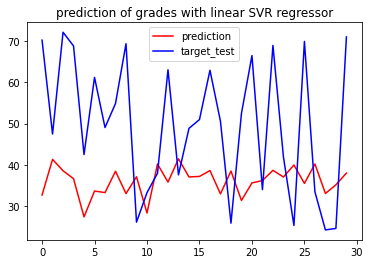

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.11888888888888886
j 0.11888888888888886
median error 25.396601633012523
Mean squared error 872.9756451625083
Mean absolute error 24.68138900465382


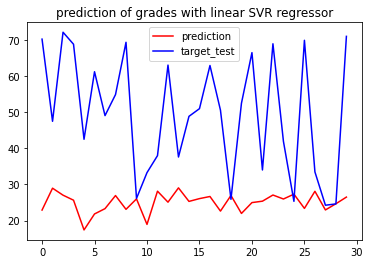

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.12030303030303029
j 0.12030303030303029
median error 14.452151786020591
Mean squared error 382.72959236887874
Mean absolute error 16.980609411806395


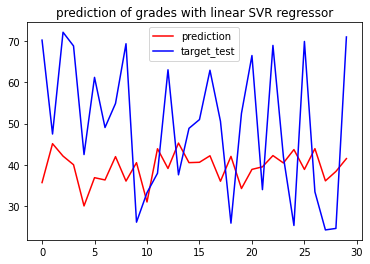

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.1217171717171717
j 0.1217171717171717
median error 20.864246044862824
Mean squared error 656.4655255828787
Mean absolute error 21.28671639572006


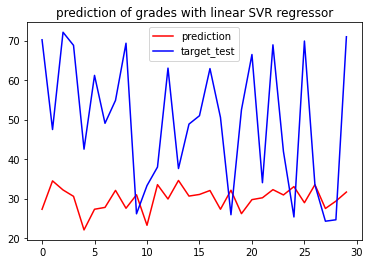

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.1231313131313131
j 0.1231313131313131
median error 14.50549647016469
Mean squared error 421.1230566217511
Mean absolute error 17.67547618616654


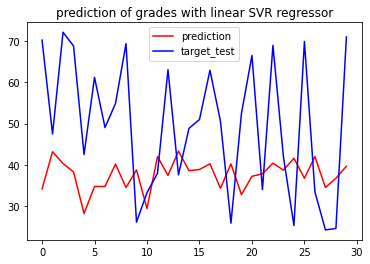

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.12454545454545453
j 0.12454545454545453
median error 17.09981640782454
Mean squared error 507.63503148271633
Mean absolute error 18.903472645261505


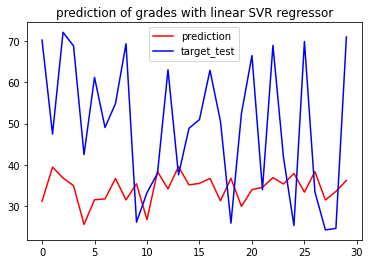

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.12595959595959594
j 0.12595959595959594
median error 16.093748793934438
Mean squared error 345.3247440809325
Mean absolute error 16.217479106545575


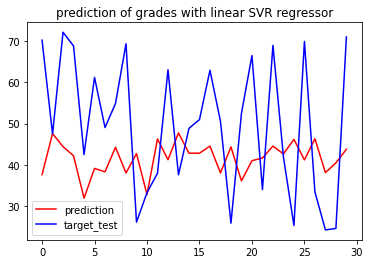

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.12737373737373736
j 0.12737373737373736
median error 12.81515001479239
Mean squared error 541.7753124123241
Mean absolute error 17.944953275547164


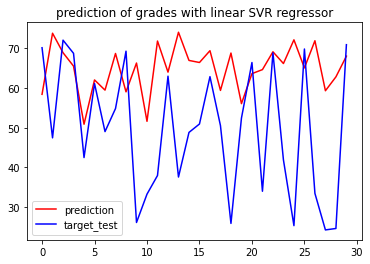

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.12878787878787878
j 0.12878787878787878
median error 12.76621713504419
Mean squared error 521.6875755528255
Mean absolute error 17.613398537890305


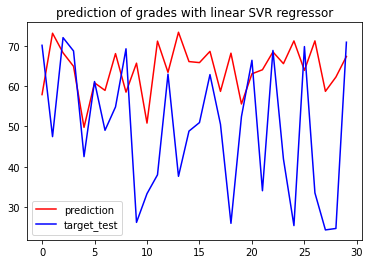

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.13020202020202018
j 0.13020202020202018
median error 25.605689819262317
Mean squared error 884.8109492218447
Mean absolute error 24.886396435470626


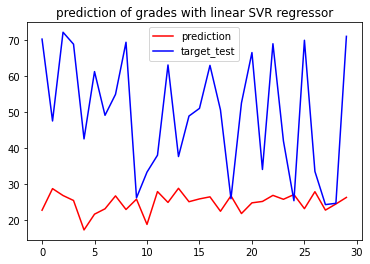

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.1316161616161616
j 0.1316161616161616
median error 11.45095171341
Mean squared error 397.5406139748911
Mean absolute error 16.02376377471904


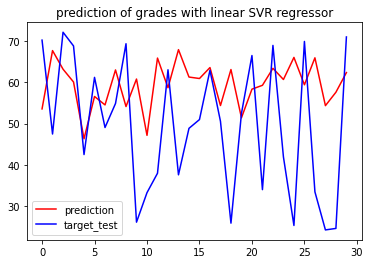

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.13303030303030303
j 0.13303030303030303
median error 23.581673703856918
Mean squared error 783.3387932347421
Mean absolute error 23.309104731149546


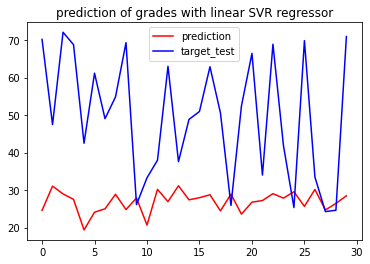

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.13444444444444442
j 0.13444444444444442
median error 16.48469281158433
Mean squared error 291.3700584250723
Mean absolute error 15.089838970921676


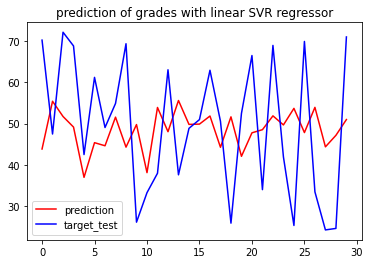

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.13585858585858585
j 0.13585858585858585
median error 20.91084439304386
Mean squared error 656.7418103375633
Mean absolute error 21.291945051965463


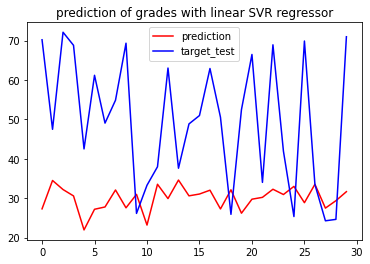

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.13727272727272727
j 0.13727272727272727
median error 12.702325490843329
Mean squared error 448.8674483552008
Mean absolute error 16.701896070885343


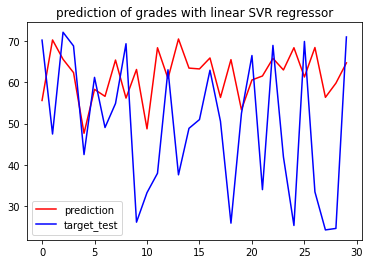

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.13868686868686866
j 0.13868686868686866
median error 25.826114075353537
Mean squared error 889.7379794178593
Mean absolute error 24.961028916269033


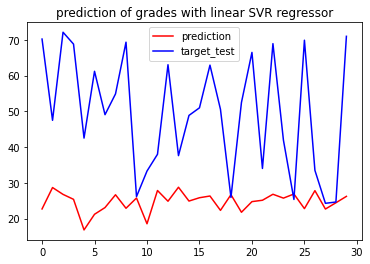

i 0.1401010101010101
j 0.1401010101010101
median error 16.50192639774884
Mean squared error 292.5859918634302
Mean absolute error 15.060142771634814


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


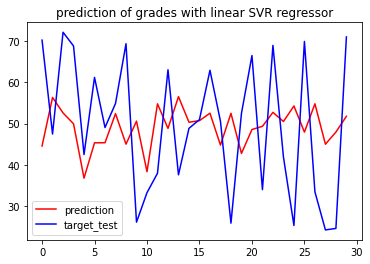

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.1415151515151515
j 0.1415151515151515
median error 26.610081628163844
Mean squared error 935.2347194706323
Mean absolute error 25.75220595175319


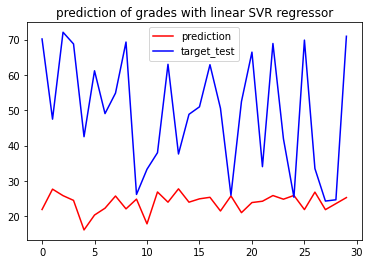

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.1429292929292929
j 0.1429292929292929
median error 16.571166182065195
Mean squared error 292.46795356521784
Mean absolute error 15.00653289910473


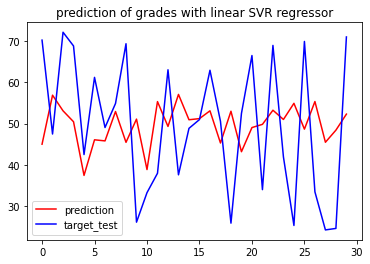

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.14434343434343433
j 0.14434343434343433
median error 16.360418869539014
Mean squared error 295.90676065798846
Mean absolute error 14.895173644913218


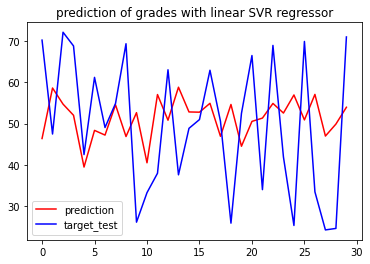

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.14575757575757575
j 0.14575757575757575
median error 25.77763100283133
Mean squared error 887.5310723423646
Mean absolute error 24.92333594220022


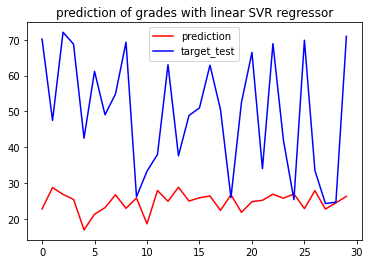

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.14717171717171715
j 0.14717171717171715
median error 15.966380365811256
Mean squared error 320.9113509944689
Mean absolute error 15.870295038668287


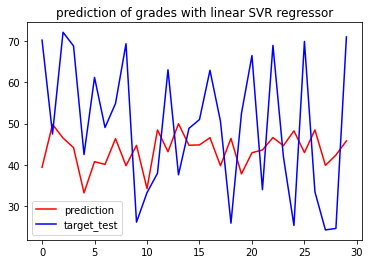

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.14858585858585857
j 0.14858585858585857
median error 15.098449326170094
Mean squared error 303.58421701746516
Mean absolute error 14.93511039290926


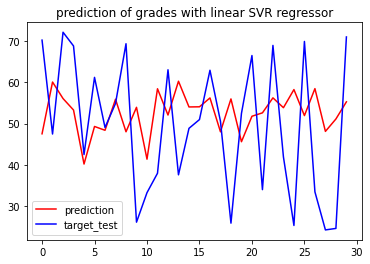

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


i 0.15
j 0.15
median error 16.614720144787114
Mean squared error 292.74835364271155
Mean absolute error 15.012098506562795


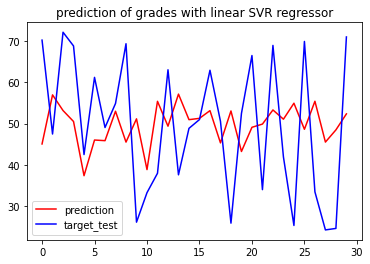

In [36]:
from sklearn.svm import LinearSVR
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
for i, j in zip(np.linspace(0.01,0.15,100),np.linspace(0.01,0.15,100)):
  svm_reg = LinearSVR(epsilon=i,C =j)
  svm_reg.fit(train_set, target_train)
  pred = svm_reg.predict(test_set)
  print("i",i)
  print("j",j)
  print("median error",median_absolute_error(target_tests, pred))
  print("Mean squared error",mean_squared_error(target_tests, pred))
  print("Mean absolute error",mean_absolute_error(target_tests, pred))
  plt.title('prediction of grades with linear SVR regressor')
  plt.plot(pred,color = 'red', label = 'prediction')
  plt.plot(target_tests,color = 'blue', label = 'target_test')
  plt.legend()
  plt.show()